In [1]:
import astropy.units as u
from tdsat_telescope import load_telescope_parameters
from tdsat_sensitivity import src_rate, bgd_sky_qe_rate, bgd_electronics, calc_exposure
from tdsat_neff import get_neff
from bbmag import bb_abmag_fluence, bb_abmag
import numpy as np
from matplotlib import pyplot as plt

from astropy.coordinates import Distance


from astropy.visualization import quantity_support
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [2]:
siglimit = 10. # sigma
read_noise = 3.*(2**0.5) # Read noise for two frames

# Target value
AB = 22*u.ABmag

point_drift = 1*u.arcsec # To be added to the PSF in quadrature
point_jitter = 5*u.arcsec
# Define bands
td1_band = [193, 233]*u.nm


# Transmission efficiency
trans_eff = (0.975)**8 # from Jim. 

print('Transmission efficiency: {}'.format(trans_eff))

ab_vega = 1.73

# Load Tony's lightcurves
shock = np.loadtxt('input_data/shock.dat')
blukn = np.loadtxt('input_data/kilonova_blue.dat')


center = 208
width = 53

bandone=[center - 0.5*width, center+0.5*width]*u.nm


center = 284
width = 68
bandtwo=[center - 0.5*width, center+0.5*width]*u.nm





Transmission efficiency: 0.8166518036622619


In [3]:
# Load telescope info
config=11
diameter, qe, psf_size, pixel_size, efficiency = load_telescope_parameters(config)
area = np.pi * (diameter*0.5)**2

area_onaxis = np.pi * (0.5*24.2*u.cm)**2
efficiency = area_onaxis / area


Telescope Configuration 11
Name: Small Focal Plane CMOS
Entrance Pupil diameter 26.0 cm
Optical Efficiency 0.7893639053254439
PSF FWHM 4.288 arcsec
Pixel size 6.4 arcsec
Effective Aperture 23.1 cm
Effective Area 419.09631397051237 cm2


In [4]:
# First, get absolute mags in-band
dist = 10*u.pc


all_mag1 = []
all_mag2 = []
all_sw = []

all_time = blukn[:, 0]*u.d
for row in blukn:
    thismag = (row[16]+ab_vega)*u.ABmag
    swiftmag = thismag
    bbtemp = row[4]*u.K
    peaktime = row[0]

    band1_mag, band2_mag = bb_abmag(dist = dist,
                                    bbtemp = bbtemp,
                                    swiftmag = swiftmag,
                                    diag=False, bandone=bandone, bandtwo=bandtwo)
    
    all_mag1 = np.append(all_mag1, band1_mag)
    all_mag2 = np.append(all_mag2, band2_mag)
    all_sw = np.append(all_sw, swiftmag)

color_kn = all_mag2.value - all_mag1.value
time_kn = all_time

/Users/bwgref/science/local/anaconda/envs/nickenv/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


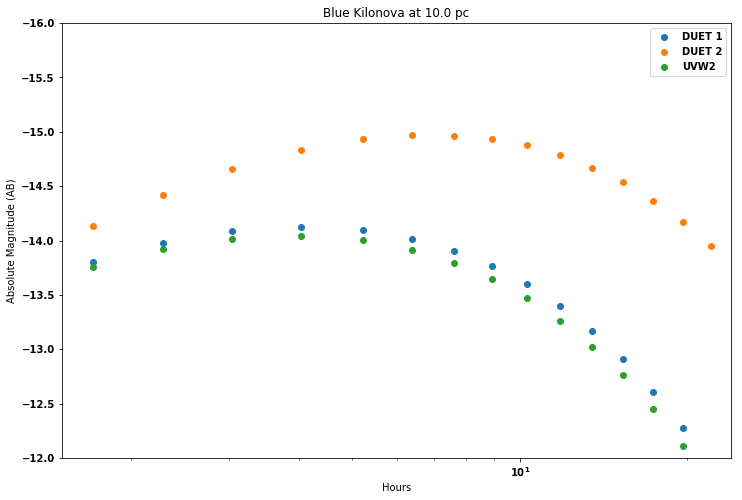

In [5]:
with quantity_support():
    plt.figure(figsize=[12, 8])

    plt.scatter(all_time.to(u.hr), all_mag1.value, label='DUET 1')
    plt.scatter(all_time.to(u.hr), all_mag2.value, label='DUET 2')
    plt.scatter(all_time.to(u.hr), all_sw.value, label='UVW2')
    
    plt.title('Blue Kilonova at {}'.format(dist))

    plt.ylim([-12, -16])
    plt.xlim([1.5, 24])
    plt.xscale('Log')

    plt.ylabel('Absolute Magnitude (AB)')
    plt.xlabel('Hours')
    plt.legend()
    plt.show()

In [6]:
# For ALIGO BNS Range
r = 175 * u.Mpc
d = Distance(r)

peak_abs_mag = -14 * u.ABmag
peak_apparent_mag = peak_abs_mag + d.distmod
print('Blue Kilonova peak luminosity in DUET1 {}'.format(peak_apparent_mag))

peak_abs_mag = -15 * u.ABmag
peak_apparent_mag = peak_abs_mag + d.distmod
print('Blue Kilonova peak luminosity in DUET2 {}'.format(peak_apparent_mag))


Blue Kilonova peak luminosity in DUET1 22.215190243431472 mag(AB)
Blue Kilonova peak luminosity in DUET2 21.215190243431472 mag(AB)


In [7]:
# FOR A+ BNS Range:
r = 315 * u.Mpc
d = Distance(r)

peak_abs_mag = -14 * u.ABmag
peak_apparent_mag = peak_abs_mag + d.distmod
print('Blue Kilonova peak luminosity in DUET1 {}'.format(peak_apparent_mag))


peak_abs_mag = -15 * u.ABmag
peak_apparent_mag = peak_abs_mag + d.distmod
print('Blue Kilonova peak luminosity in DUET2 {}'.format(peak_apparent_mag))



Blue Kilonova peak luminosity in DUET1 23.491552768948004 mag(AB)
Blue Kilonova peak luminosity in DUET2 22.491552768948004 mag(AB)


In [8]:
dist = 10*u.pc
ab_vega = 1.73

# Load Tony's lightcurves
blukn = np.loadtxt('input_data/kilonova_blue.dat')


# First, get absolute mags in-band
dist = 10*u.pc


all_mag1 = []
all_mag2 = []
all_sw = []
all_time = shock[:, 1]*u.d
for row in shock:
    thismag = (row[14]+ab_vega)*u.ABmag
    swiftmag = thismag
    bbtemp = row[3]*u.K

    band1_mag, band2_mag = bb_abmag(dist = dist,
                                    bbtemp = bbtemp,
                                    swiftmag = swiftmag,
                                    diag=False, bandone=bandone, bandtwo=bandtwo)
    
    all_mag1 = np.append(all_mag1, band1_mag)
    all_mag2 = np.append(all_mag2, band2_mag)
    all_sw = np.append(all_sw, swiftmag)


color_shock = all_mag2.value - all_mag1.value
time_shock = all_time


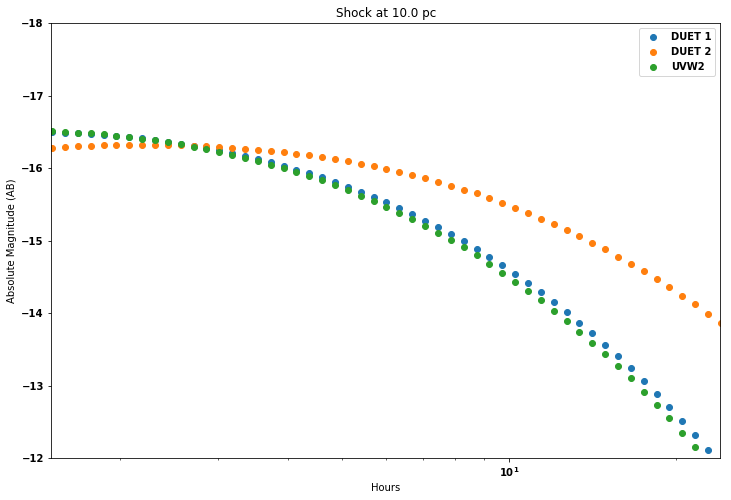

In [9]:
with quantity_support():
    plt.figure(figsize=[12, 8])

    plt.scatter(all_time.to(u.hr), all_mag1.value, label='DUET 1')
    plt.scatter(all_time.to(u.hr), all_mag2.value, label='DUET 2')
    plt.scatter(all_time.to(u.hr), all_sw.value, label='UVW2')
    
    plt.title('Shock at {}'.format(dist))

    plt.ylim([-12, -18])
    plt.xlim([1.5, 24])
    plt.xscale('Log')

    plt.ylabel('Absolute Magnitude (AB)')
    plt.xlabel('Hours')
    plt.legend()
    plt.show()

In [10]:
# For ALIGO BNS Range
r = 175 * u.Mpc
d = Distance(r)

peak_abs_mag = -16.5 * u.ABmag
peak_apparent_mag = peak_abs_mag + d.distmod
print('Shock at peak luminosity in DUET1 {}'.format(peak_apparent_mag))

peak_abs_mag = -16.2 * u.ABmag
peak_apparent_mag = peak_abs_mag + d.distmod
print('Shock at peak luminosity in DUET2 {}'.format(peak_apparent_mag))



Shock at peak luminosity in DUET1 19.715190243431472 mag(AB)
Shock at peak luminosity in DUET2 20.015190243431473 mag(AB)


In [11]:
# For A+ BNS Range
r = 315 * u.Mpc
d = Distance(r)

peak_abs_mag = -16.5 * u.ABmag
peak_apparent_mag = peak_abs_mag + d.distmod
print('Shock at peak luminosity in DUET1 {}'.format(peak_apparent_mag))

peak_abs_mag = -16.2 * u.ABmag
peak_apparent_mag = peak_abs_mag + d.distmod
print('Shock at peak luminosity in DUET2 {}'.format(peak_apparent_mag))



Shock at peak luminosity in DUET1 20.991552768948004 mag(AB)
Shock at peak luminosity in DUET2 21.291552768948005 mag(AB)


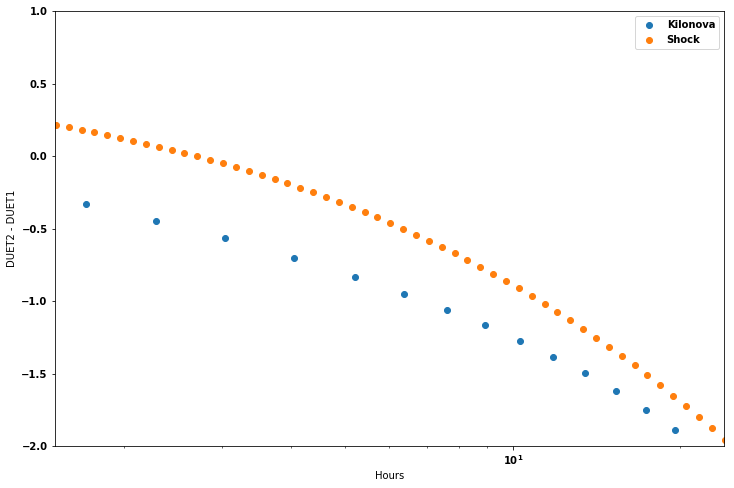

In [14]:
with quantity_support():
    plt.figure(figsize=[12, 8])

    plt.scatter(time_kn.to(u.hr), color_kn, label='Kilonova')
    plt.scatter(time_shock.to(u.hr), color_shock, label='Shock')
    

    plt.ylim([-2, 1])
    plt.xlim([1.5, 24])
    plt.xscale('Log')

    plt.ylabel('DUET2 - DUET1')
    plt.xlabel('Hours')
    plt.legend()
    plt.show()